In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
df=pd.read_csv("new_train.csv")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [4]:
df["previous"].unique()

array([0, 1, 3, 4, 2, 6, 5, 7], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [6]:
df["y"]=df["y"].map({"yes":1,"no":0})

C:\Users\JAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration', ylabel='y'>

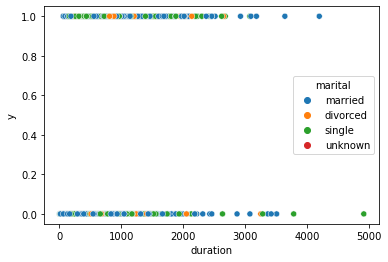

In [7]:
sns.scatterplot("duration","y",hue="marital",data=df)

C:\Users\JAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='duration'>

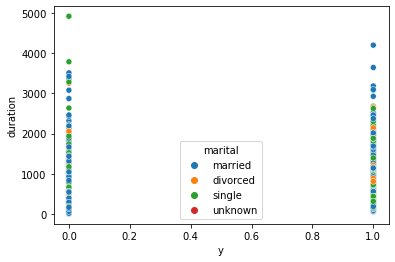

In [8]:
sns.scatterplot("y","duration",hue="marital",data=df)

C:\Users\JAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='duration'>

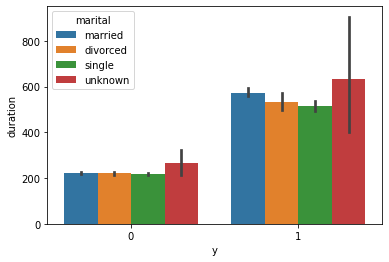

In [9]:
sns.barplot("y","duration",hue="marital",data=df)

<AxesSubplot:xlabel='job'>

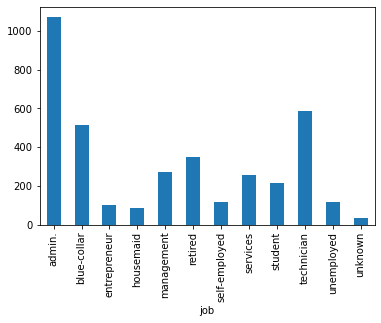

In [10]:
df.groupby("job")["y"].sum().plot(kind="bar")

<AxesSubplot:xlabel='education'>

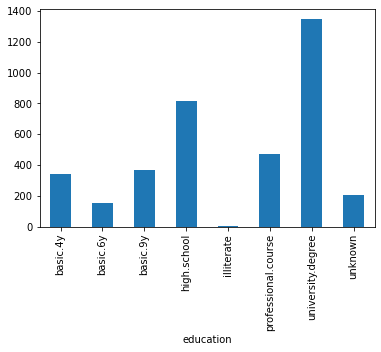

In [11]:
df.groupby("education")["y"].sum().plot(kind="bar")

<AxesSubplot:xlabel='month'>

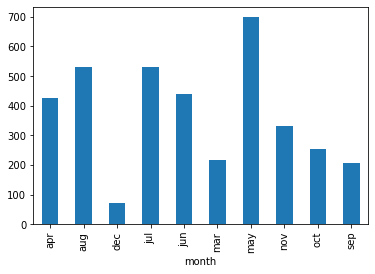

In [12]:
df.groupby("month")["y"].sum().plot(kind="bar")

<AxesSubplot:xlabel='marital'>

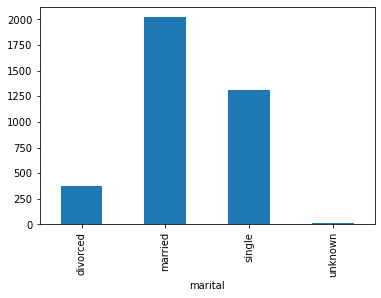

In [13]:
df.groupby("marital")["y"].sum().plot(kind="bar")

C:\Users\JAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

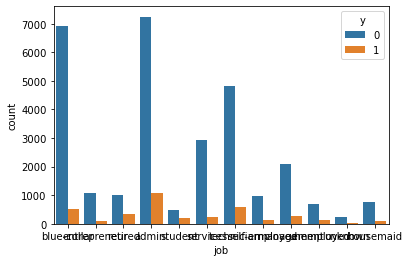

In [14]:
sns.countplot("job",hue="y",data=df)

In [15]:
df["y"].value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [16]:
df.drop(["month","day_of_week"],axis=1,inplace=True)

In [17]:
df["job"].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

In [18]:
df["job"]=df["job"].map({"unemployed":1,"unknown":0,"housemaid":1,"student":1,"services":2,"technician":2,"self-employed":2,"management":2,"admin.":3,"retired":3,"entrepreneur":3,"blue-collar":3})

In [19]:
df["marital"].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

In [20]:
df["marital"]=df["marital"].map({"married":2,"divorced":1,"single":1,"unknown":1})

In [21]:
df["education"].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [22]:
df["education"]=df["education"].map({"illiterate":0,"basic.4y":0,"basic.6y":0,"basic.9y":0,"high.school":1,"professional.course":2,"university.degree":3,"unknown":1})

In [23]:
df["education"].value_counts()

0    10029
3     9736
1     8993
2     4192
Name: education, dtype: int64

In [24]:
df["default"]=df["default"].map({"unknown":0,"no":0,"yes":1})
df["housing"]=df["housing"].map({"unknown":0,"no":0,"yes":1})
df["loan"]=df["loan"].map({"unknown":0,"no":0,"yes":1})
df["contact"]=df["contact"].map({"cellular":0,"telephone":1})
df["pdays"]=df["pdays"].replace(999,0)
df["poutcome"]=df["poutcome"].map({"nonexistent":0,"failure":1,"success":2})

In [25]:
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,49,3,2,0,0,0,0,0,227,4,0,0,0,0
1,37,3,2,3,0,0,0,1,202,2,0,1,1,0
2,78,3,2,0,0,0,0,0,1148,1,0,0,0,1
3,36,3,2,3,0,1,0,1,120,2,0,0,0,0
4,59,3,1,3,0,0,0,0,368,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,2,1,1,0,1,0,0,192,1,0,0,0,0
32946,52,2,2,2,0,1,0,0,64,1,0,1,1,0
32947,54,3,2,0,0,0,1,0,131,4,0,0,0,0
32948,29,3,2,3,0,0,0,1,165,1,0,0,0,0


<AxesSubplot:>

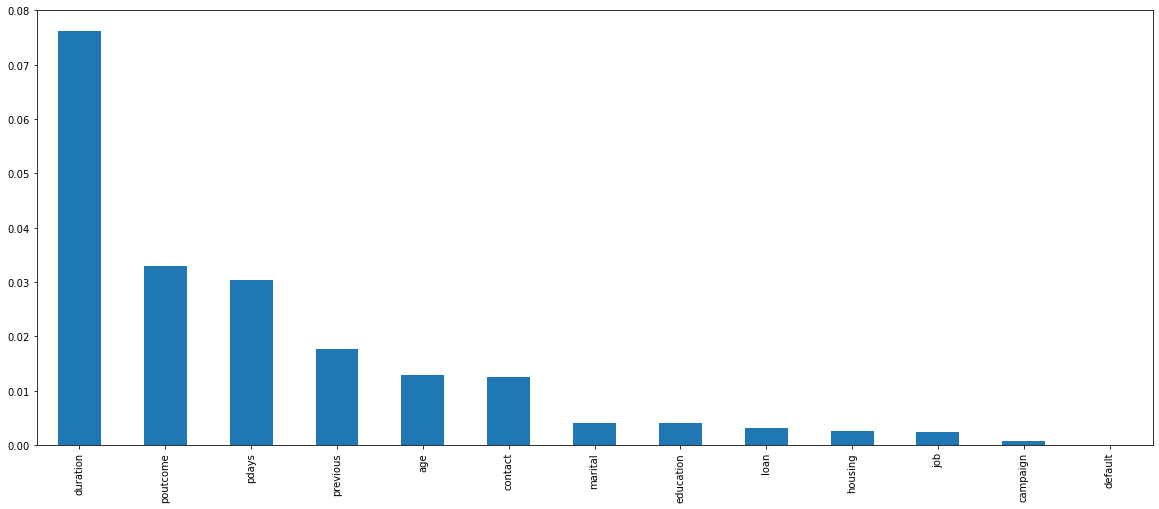

In [26]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(df[df.columns.difference(["y"])], df["y"])
mutual_info = pd.Series(mutual_info)
mutual_info.index = df[df.columns.difference(["y"])].columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [27]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
sel_five_cols.fit(df[df.columns.difference(["y"])], df["y"])
columns=df[df.columns.difference(["y"])].columns[sel_five_cols.get_support()]
df1=df[columns]

In [28]:
y=df["y"]

In [29]:
df1

,age,contact,duration,marital,pdays,poutcome,previous
0,49,0,227,2,0,0,0
1,37,1,202,2,0,1,1
2,78,0,1148,2,0,0,0
3,36,1,120,2,0,0,0
4,59,0,368,1,0,0,0
...,...,...,...,...,...,...,...
32945,28,0,192,1,0,0,0
32946,52,0,64,2,0,1,1
32947,54,0,131,2,0,0,0
32948,29,1,165,2,0,0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, random_state=5)

In [29]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [31]:
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

rus = RandomUnderSampler(random_state=500)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)

print('Original dataset shape {}'.format(Counter(y_train)))
print('Undersampled dataset shape {}'.format(Counter(y_under_train)))


Original dataset shape Counter({0: 20470, 1: 2595})
Undersampled dataset shape Counter({0: 2595, 1: 2595})


In [32]:
from sklearn.ensemble import RandomForestClassifier
pargrid_rf = {'n_estimators': [50, 60, 70, 80, 90, 100],
                  'max_features': [5,6,7,8,9,10,11,12]}

from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(X_under_train,y_under_train)
print(gscv_results.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\JAY\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.78188825 0.77996146 0.78285164 0.77668593 0.77842004 0.78015414
 0.77822736 0.78092486 0.77379576 0.77842004 0.77745665 0.77996146
 0.77668593 0.77649326 0.7805395  0.7743738  0.77899807 0.77707129
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


{'max_features': 5, 'n_estimators': 70}


In [33]:
radm_clf = RandomForestClassifier(n_estimators=80, max_features=7, n_jobs=-1)
radm_clf.fit( X_under_train,y_under_train )

RandomForestClassifier(max_features=7, n_estimators=80, n_jobs=-1)

In [34]:
tree_cm = metrics.confusion_matrix( y_under_train ,
                                  radm_clf.predict(X_under_train) ,
                                 [1,0] )
tree_cm



C:\Users\JAY\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[2581,   14],
       [  12, 2583]], dtype=int64)

In [35]:
metrics.roc_auc_score(y_train,radm_clf.predict(X_train))

0.8955194076015185

In [36]:
print(metrics.accuracy_score(y_train,radm_clf.predict(X_train)))
print(metrics.accuracy_score(y_test,radm_clf.predict(X_test)))

0.8187296769997833
0.7693474962063733


In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
x=radm_clf.predict([[49,0,560,2,0,0,0]])
x[0]

1

In [40]:
import joblib
joblib.dump(radm_clf,"model1")

['model1']